<h1>Simple Linear Regression</h1>
This notebook is designed to explain and implement simple linear regression in python, without the use of any machine learning libraries.

## What is Simple Linear Regression?

Simple linear regression is one of the simplest, oldest and most useful models that exist. It has been around for a very long time, but is still used to today for simple data sets and predictions! Simple linear regression involves predicting the value of $y$ given one input value, or feature, $x$. Then, after predicting values, you can use what is called a least squares regression line (LSRL) to show how close to the actual values your predictions are! In this notebook, I am going to show you how to implement this from scratch in python, and see how well it performs!

This cell will import all of our necessary libraries for the first part of the notebook: pyplot, numpy, and math.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
np.random.seed(42)

## Data Overview

Here, we are creating two numpy arrays: One has all of our input values (X), while the other has our target values (y). For the target values, I just increased the scale of each input value, but added a fair amount of extra noise to make sure that there was a decent, positive, linear relationship between the input and target arrays since this is just a demonstration of the math behind Linear Regression.

In [2]:
X = np.random.randint(500, 1000, size = 50)
y = X * 50 + 10000 + np.random.randint(-10000, 10000, size = 50)

Let us first use pyplot to visualize where our data currently stands with a simple scatter plot. As you can see, the relationship between our input values and our target values is fairly linear!

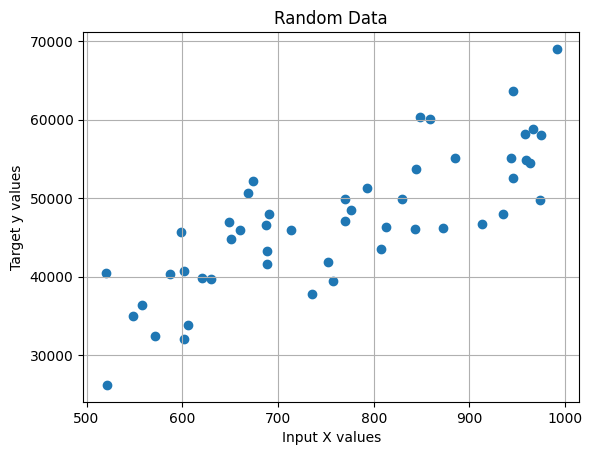

In [3]:
plt.scatter(X, y)
plt.xlabel("Input X values")
plt.ylabel("Target y values")
plt.title("Random Data")
plt.grid()
plt.show()

## Creating Our Model

Now, lets implement our linear regression equation so that we can predict what the values might be based on our input, and then see how close we are to the actual target. We will use this equation to calculate the values needed for our LSRL, or Least Squares Regression Line:<br>
$$
w_{1} = \frac{\displaystyle \sum_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y})}{\displaystyle \sum_{i=1}^{n}(x_{i}-\bar{x})^2}
$$
$$
w_{0} = \bar{y}-\hat{w}_{1}\bar{x}
$$
In this equation: <br>
$x_{i}$ is the value of our inputs <br>
$\bar{x}$ is the mean of all of our x values <br>
$y_{i}$ is the value of our targets <br>
$\bar{y}$ is the mean of all of our y values <br>
$\hat{y}$ are our predicted y values <br>
$w_{0}$ is the y-intercept of the LSRL <br>
$w_{1}$ is the slope of the LSRL <br>

In the cell below, we are just calculating all of these values:

In [10]:
X_mean = np.mean(X) # Mean of all of our inputs 
y_mean = np.mean(y) # Mean of all of our targets

# Sum of: inputs - mean of inputs * targets - mean of targets
numerator = np.sum((X - X_mean) * (y - y_mean)) 

# Sum of: inputs - mean of inputs (squared)
denominator = np.sum((X - X_mean) ** 2)

# Slope is just numerator / denominator (${})
slope = numerator / denominator

# Y-intercept is mean of targets - slope * mean of inputs
intercept = y_mean - slope * X_mean

# Finally, we will compute the predicted vector which is our inputs * slope + intercept (basically just y = mx + b)
predicted_y = X * slope + intercept

Printing the vector of predicted_y values just kind of looks like a ton of values, but these are the values that are model predicted for each of the inputted x values! Lets graph the original data as well as the LSRL to see how good our predictions were:

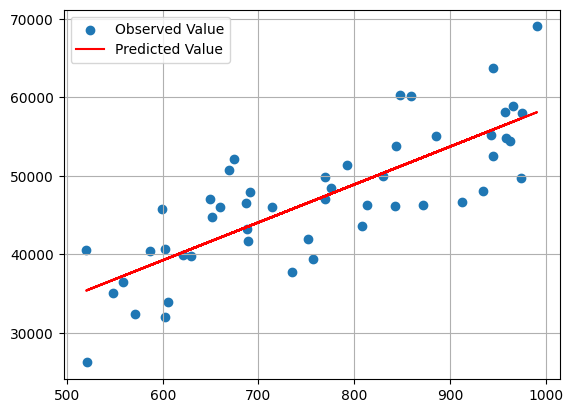

In [5]:
plt.scatter(X, y, label = "Observed Value")
plt.plot(X, predicted_y, label = "Predicted Value", color="red")
plt.grid()
plt.legend()
plt.show()

## Performance Analysis

As you can see, our LSRL did pretty well in showing the relationship! There are many ways to gauge the actual performance of a model with metrics, with one of the most common being the Mean Squared Error, or MSE for short. MSE is the average squared difference between the model's predicted values and the actual values. We can calculate it with this equation:<br>
$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^2$$
In this equation:<br>
$n$ is the amount of data points we have <br>
$y_{i}$ are our actual data points<br>
$\hat{y_{i}}$ are our predicted data points

In [6]:
mse = 1/len(y) * np.sum((y - predicted_y) ** 2)
print(mse)

26409887.957279865


Hmmmm... that doesn't really tell us much, since its just a huge number. Remember, this is the SQUARED average difference between the predicted and actual values, so lets just take the square root. This gives us the RMSE, or the Root Mean Squared Error for our model. This is much easier to interpret because it is based in the same scale for our actual data:

In [7]:
rmse = round(math.sqrt(mse), 3)
rmse

5139.055

So, this value tells us that on average, our model is off by about 5,139.055 for any given data point. This might not sound great, but lets take a look at the range of our target y values: In cell 3, when we created our data, we set numpy to generate the target values with noise for each point anywhere from -10,000 to 10,000. So, if we are predicting almost within 5,000 for each point, that's pretty good considering our noise! Lets use another metric to determine how good our model is doing: This time we will use $R^2$ score, or the coefficient of determination.

$R^2$ score is determined by the following formula:<br>
$$
R^2 = 1 - \frac{\displaystyle \sum_{i}(y_{i}-\hat{y}_{i})^2}{\displaystyle \sum_{i}(y_{i}-\bar{y})^2}
$$
In this formula: <br>
$y_{i}$ is our actual target values<br>
$\tilde{y_{i}}$ is the mean of our target values<br>
$\hat{y}$ is our predicted values


In [8]:
r_squared = round(1 - (np.sum((y - predicted_y) ** 2) / np.sum((y - y_mean) ** 2)), 3)
print(r_squared)

0.64


$R^2$ score is a a metric that measures <u>how much of the variance of the model is explained by the input:</u> This is a great way to measure how good your input feature is at predicting the proper output! In our case, the input values explain 64% of the variance of our model, which is not bad, considering that we added a fair amount of noise. For example, lets see how well our model does with less noise:

In [9]:
np.random.seed(42)
X = np.random.randint(500, 1000, size = 50)
y = X * 50 + 10000 + np.random.randint(-5000, 5000, size = 50)
X_mean = np.mean(X)
y_mean = np.mean(y)
numerator = np.sum((X - X_mean) * (y - y_mean)) 
denominator = np.sum((X - X_mean) ** 2)
slope = numerator / denominator
intercept = y_mean - slope * X_mean
predicted_y = X * slope + intercept
r_squared = round(1 - (np.sum((y - predicted_y) ** 2) / np.sum((y - y_mean) ** 2)), 3)
print(r_squared)

0.849


As you can see, if we cut the noise to between -5000 and 5000, the $R^2$ score rises to about 85%, which is great! In the next notebook, we will implement multiple linear regression, where we will use actual data, and we will use multiple features to predict our target.